# Using ML Techniques for Detecting Type II Diabetes

**Eelis KOSTIAINEN, Khristen THORNBURG**

# Import Data
The data for the analysis of Diabetes is from kaggle (https://www.kaggle.com/uciml/pima-indians-diabetes-database). Import data for analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
np.random.seed(0)
sns.set()
MMOL_PER_LITRE_CONSTANT = 0.0555

In [2]:
# read data from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
pima_df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
pima_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Cleaning of Data


In [4]:
pima_df = pd.read_csv('./data/pima.csv')
pima_df.head()

FileNotFoundError: ignored

In [7]:
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# The following fields cannot physically be zero: BMI, Glucose, BloodPressure, SkinThickness

def replace_with_median(df, key, value=0):
    column = df[key].copy()
    outer = column[~(column==value)]
    return column.replace(value, outer.mean())

def sanitize_data(df):
    data = df.copy()
    data['BMI'] = replace_with_median(data, 'BMI')
    data['BloodPressure'] = replace_with_median(data, 'BloodPressure')
    data['SkinThickness'] = replace_with_median(data, 'SkinThickness')
    data['Glucose'] = replace_with_median(data, 'Glucose')
    # Prefer mmol/l over mg/Dl
    data['Glucose'] = data['Glucose'] * MMOL_PER_LITRE_CONSTANT
    
    return data

pima_df = sanitize_data(pima_df)
pima_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,6.753615,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.369578,1.689195,12.096346,8.790942,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,2.442000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,5.536125,64.000000,25.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,6.493500,72.202592,29.153420,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,7.783875,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,11.044500,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
german_df = pd.read_csv('./data/germany.csv')
german_df.head()

In [ ]:
german_df.describe()

# Data Visualization
To get a visualization of the data, start by creating a histogram plot for each of the eight categories in the dataset. This shows the distribution for each variable.

Before analysis starts, it is good to note that some of the categories do not have a Gaussian distribution. Age, pregnency and insulin are the three most obvious categories that are skewed to one side. In this data set, there are many more young patients and far fewer older patients considered. Additionally, Most patients have fewer than five pregnancies. It is also more common for the patients to not require insulin. The categories that appear to have a much more Gaussian distribution are glucose, blood pressure, skin thickness, Diabetes Pedigree Function, and BMI.

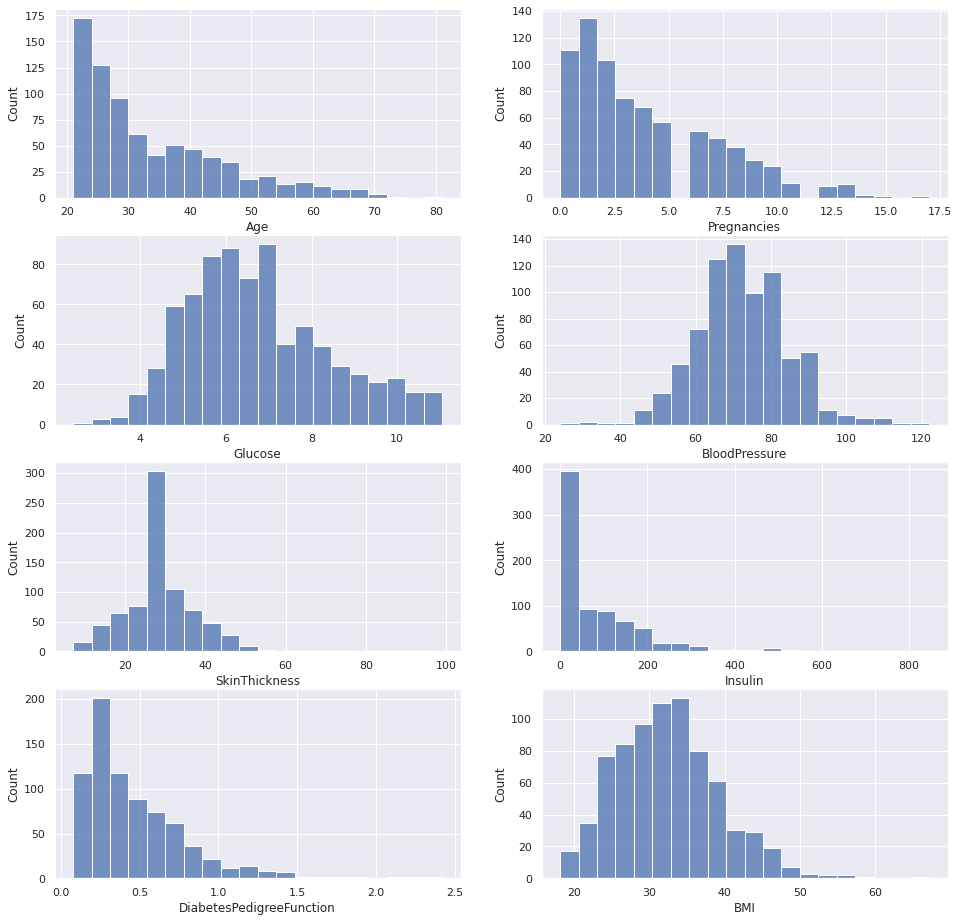

In [ ]:
#Visualize data spread by creating a count for each category of data
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.histplot(pima_df.Age, bins = 20, ax=ax[0,0])
sns.histplot(pima_df.Pregnancies, bins = 20, ax=ax[0,1])
sns.histplot(pima_df.Glucose, bins = 20, ax=ax[1,0])
sns.histplot(pima_df.BloodPressure, bins = 20, ax=ax[1,1])
sns.histplot(pima_df.SkinThickness, bins = 20, ax=ax[2,0])
sns.histplot(pima_df.Insulin, bins = 20, ax=ax[2,1])
sns.histplot(pima_df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0])
sns.histplot(pima_df.BMI, bins = 20, ax=ax[3,1])

Next, a correlation heatmap was created to see what variables seem to correlate most with the outcome. Based on the correlation map below, it seems that glucose has the highest correlation with outcome, followed by BMI, pregnancies, and Age. Blood Pressure and Skin Thickness don't appear to have much corelation with the outcome. This seems like a logical correlation.

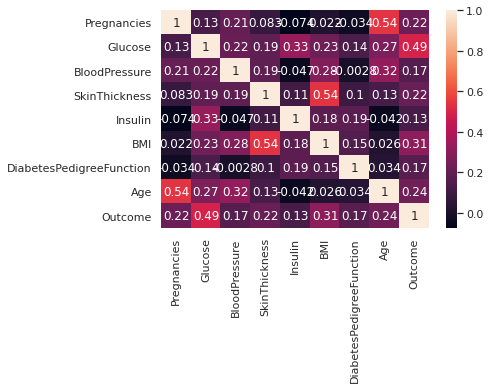

In [ ]:
sns.heatmap(pima_df.corr(), annot=True)

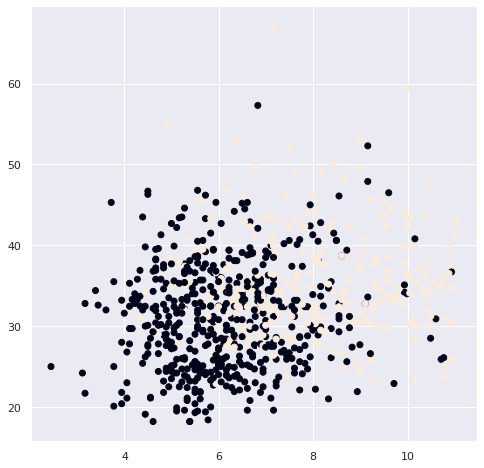

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.scatter(pima_df['Glucose'], pima_df['BMI'],c=pima_df['Outcome'])

# k Nearest Neighbor Regression

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


Perform KNN analysis on data (https://towardsdatascience.com/k-nearest-neighbor-python-2fccc47d2a55). Start with Glucose and BMI as variables because these are the two that seem to have the most coorelation with the Outcome. Create training and test data split 85/25. Then output the accuracy.

When running KNN for k = 1 to 100, the best accuracy I was able to get was 78% with a value of k = 24.

In [149]:
X = pima_df[['Glucose', 'BMI']]
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [150]:
accuracies=[]

for k in range(100):
  knn = KNeighborsClassifier(n_neighbors=k+1, metric='euclidean')
  knn.fit(X_train, y_train)

  y_pred_knn = knn.predict(X_test)
  accuracies.append(accuracy_score(y_test, y_pred_knn))

accuracy_knn = max(accuracies)
MSE_knn = np.sum((y_test-y_pred_knn)**2)/len(y_test)
print("For KNN analysis:")
print("MSE = %.3f" % MSE_knn)
print("Testing Accuracy is %.1f%% when k = %d" % (accuracy_knn*100, accuracies.index(accuracy_knn)))

For KNN analysis:
MSE = 0.255
Testing Accuracy is 78.1% when k = 24


Create two graphs to show the actual classification of the test data and the predicted classification using KNN.

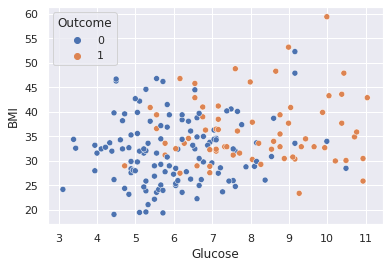

In [89]:
sns.scatterplot(
    x='Glucose',
    y='BMI',
    hue='Outcome',
    data=X_test.join(y_test, how='outer')
)

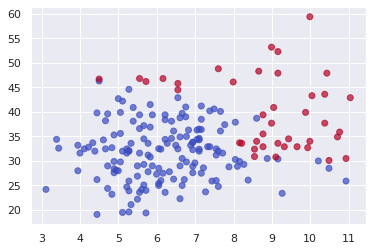

In [91]:
plt.scatter(
    X_test['Glucose'],
    X_test['BMI'],
    c=y_pred_knn,
    cmap='coolwarm',
    alpha=0.7
)

# Logistic Regression

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import *

Perform logistic regression using only Glucose and BMI as variables. Got a testing accuracy of 75.5%

In [147]:
X = pima_df[['Glucose', 'BMI']]
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [148]:
model_lr = LogisticRegression(solver='liblinear', random_state=0)
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
MSE_lr = np.sum((y_test-y_pred_lr)**2)/len(y_test)
print("MSE = %.3f" % MSE_lr)
print("Testing Accuracy: %.3f" % accuracy_lr)

MSE = 0.245
Testing Accuracy: 0.755


Test all varibles in logistic regression and see which ones affect the accuracy. Got an accuracy of 78.6% with Pregnancies, Glucose, Skin Thickness and BMI.

In [145]:
X = pima_df[['Pregnancies','Glucose', 'SkinThickness','BMI']]#'BloodPressure',,'Insulin','DiabetesPedigreeFunction','Age'
y = pima_df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [146]:
model_lr2 = LogisticRegression()
model_lr2.fit(X_train, y_train)
y_pred_lr2 = model_lr2.predict(X_test)

accuracy_lr2 = accuracy_score(y_test, y_pred_lr2)
MSE_lr2 = np.sum((y_test-y_pred_lr2)**2)/len(y_test)
print("MSE = %.3f" % MSE_lr2)
print("Testing Accuracy: %.3f" % accuracy_lr2)

MSE = 0.214
Testing Accuracy: 0.786
